Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.1420 - loss: 2.2729 - val_accuracy: 0.2810 - val_loss: 2.1127
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.2889 - loss: 2.0519 - val_accuracy: 0.3845 - val_loss: 1.8288
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.3640 - loss: 1.7978 - val_accuracy: 0.4346 - val_loss: 1.6508
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.4324 - loss: 1.6381 - val_accuracy: 0.4533 - val_loss: 1.5509
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.4596 - loss: 1.5369 - val_accuracy: 0.4760 - val_loss: 1.4823
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.4738 - loss: 1.4844 - val_accuracy: 0.5027 - val_loss: 1.4217
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5042 - loss: 1.4109 - val_accuracy: 0.5140 - val_loss: 1.3858
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5236 - loss: 1.3590 - val_acc

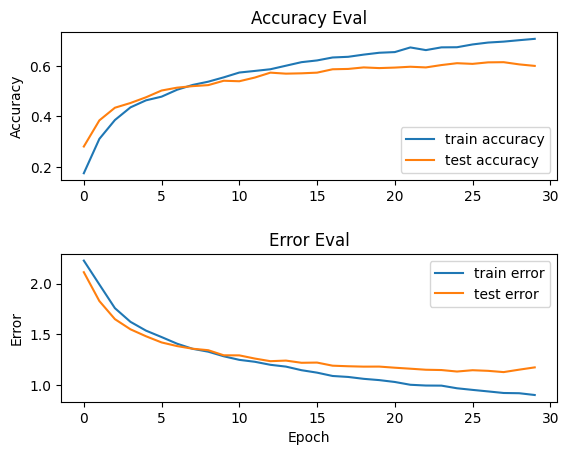

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5947 - loss: 1.2210

Accuracy on test set is 0.5987184643745422


In [6]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"


def load_data(data_path):
    """
    Loads dataset from json file

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets

    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    return X, y


def prepare_datasets(test_size, validation_size):
    """Receives a dataset and splits it in training, validation and testing sets. Features and labels are returned in separate arrays.

    :param test_size: float value that represents the percent amount of the dataset that should be used for testing.
    :param validation_size: float value that represents the percent amount of the dataset that should be used for validation.
    :return X_train: features dataset for training.
    :return X_validation: features dataset for validation.
    :return X_test: features dataset for testing.
    :return y_train: labels for training.
    :return y_validation: labels for validation.
    :return y_test: labels for testing.
    """
    # load data
    X, y = load_data(DATASET_PATH)

    # create the train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # create the train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """ Function to build an RNN LSTM model.

    :param input_shape: Shape of the dataset used as input.
    :return: model: built model
    """

    # create model
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer with softmax
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)

    # extract index with max value
    predicted_index = np.argmax(prediction, axis=1) # will return [X]
    print(f"Expected index {y}\n"
          f"Predicted Index: {predicted_index}")


def plot_history(history):

    fig, axs = plt.subplots(2)

    #create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Eval")

    #create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Eval")

    plt.subplots_adjust(hspace=0.5)
    plt.show()


if __name__ == "__main__":
    # create train, validation and test sets (a custom function is being used)
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(test_size=0.25, validation_size=0.2)

    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = build_model(input_shape)

    # compile the network
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # train the CNN
    history = model.fit(X_train,
                y_train,
                validation_data=(X_validation, y_validation),
                batch_size=32,
                epochs=30)

    #plot accuracy/error for training and validation
    plot_history(history)

    # evaluate the CNN on the test set
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("\nAccuracy on test set is {}".format(test_accuracy))


